In [40]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.segmentation import slic, mark_boundaries
import pygast
import pygast_detector as pd
import util
import matplotlib.pyplot as plt

reload(util)
reload(pd)

%matplotlib inline

['GPU', '640x480', 7] 0.072781 sec
['GPU', '320x240', 7] 0.018285 sec
['GPU', '160x120', 7] 0.005567 sec
['CPU', '640x480', 7] 11.256648 sec
['CPU', '320x240', 7] 2.613114 sec
['CPU', '160x120', 7] 0.565458 sec
['GPU', '640x480', 7] 0.067923 sec
['GPU', '320x240', 7] 0.018658 sec
['GPU', '160x120', 7] 0.005304 sec
['CPU', '640x480', 7] 11.316994 sec
['CPU', '320x240', 7] 2.630372 sec
['CPU', '160x120', 7] 0.569202 sec
['GPU', '640x480', 7] 0.067979 sec
['GPU', '320x240', 7] 0.018801 sec
['GPU', '160x120', 7] 0.005184 sec
['CPU', '640x480', 7] 11.319818 sec
['CPU', '320x240', 7] 2.620017 sec
['CPU', '160x120', 7] 0.559167 sec
['GPU', '640x480', 7] 0.068430 sec
['GPU', '320x240', 7] 0.018866 sec
['GPU', '160x120', 7] 0.005220 sec
['CPU', '640x480', 7] 11.249457 sec
['CPU', '320x240', 7] 2.609914 sec
['CPU', '160x120', 7] 0.563126 sec
['GPU', '640x480', 7] 0.067790 sec
['GPU', '320x240', 7] 0.018711 sec
['GPU', '160x120', 7] 0.005241 sec
['CPU', '640x480', 7] 11.273842 sec
['CPU', '320x24

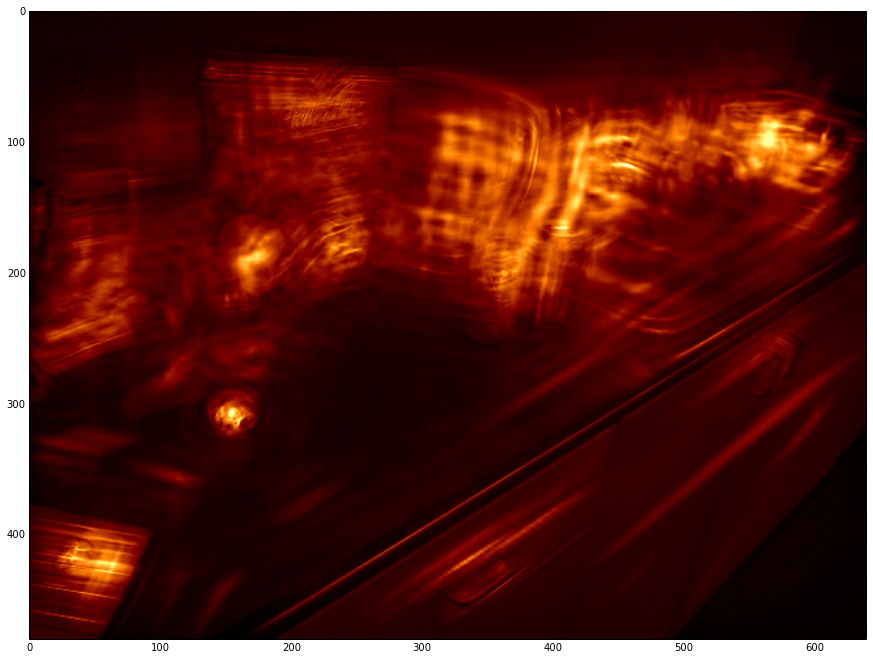

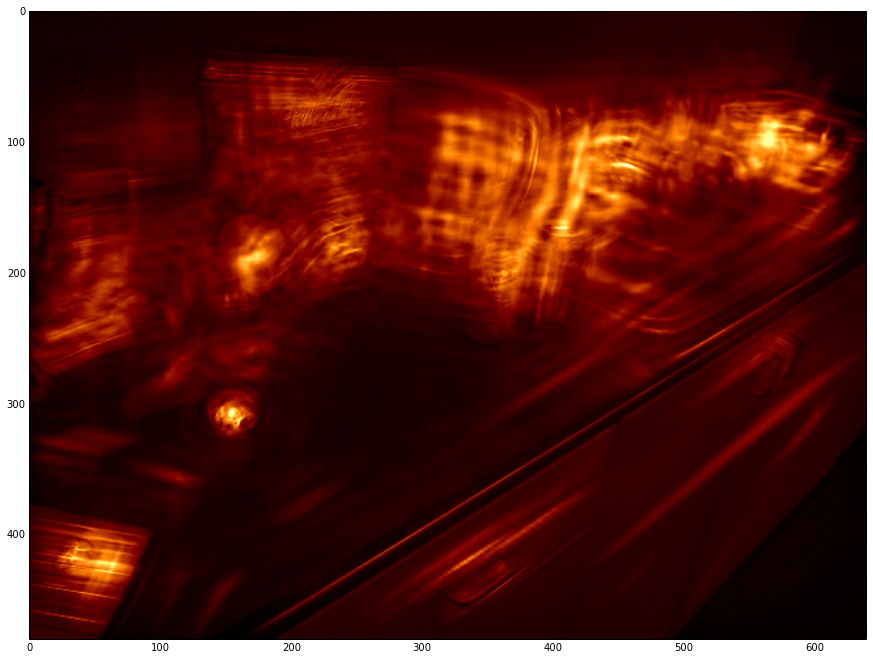

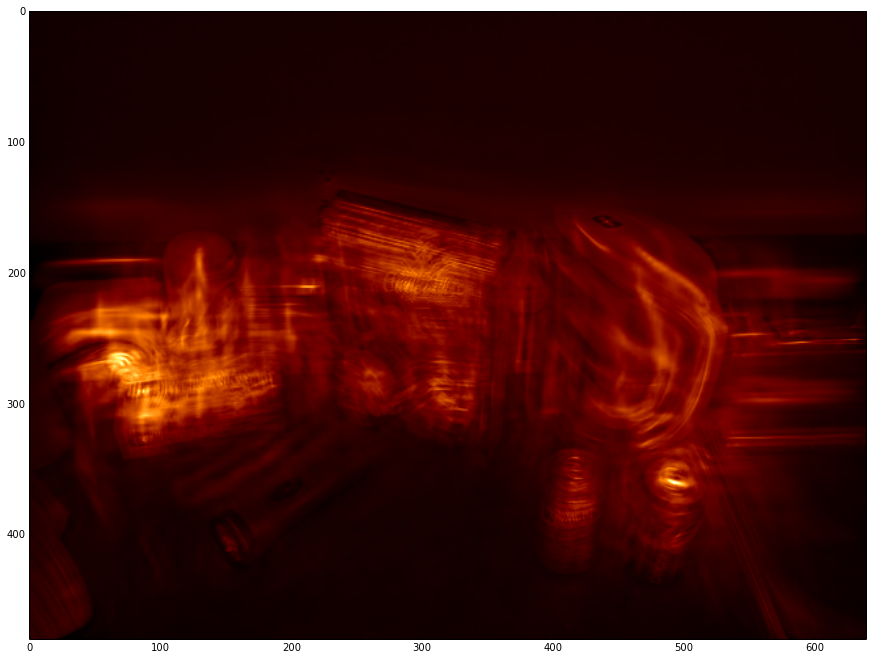

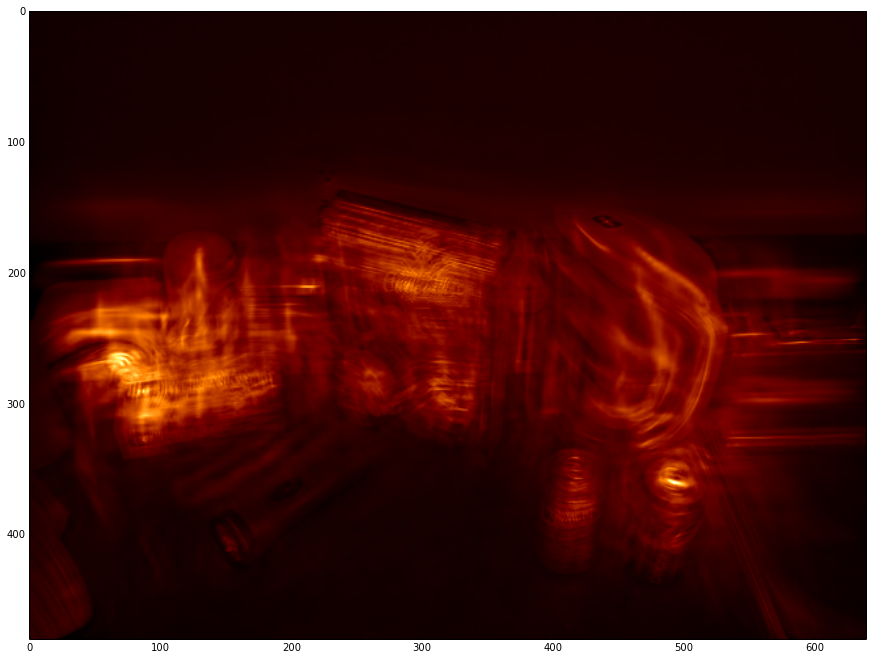

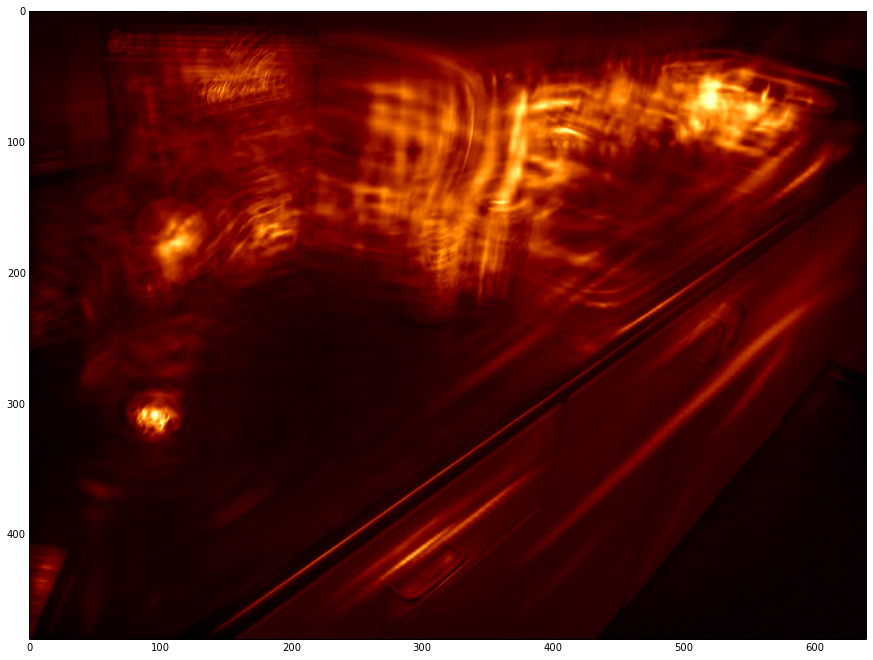

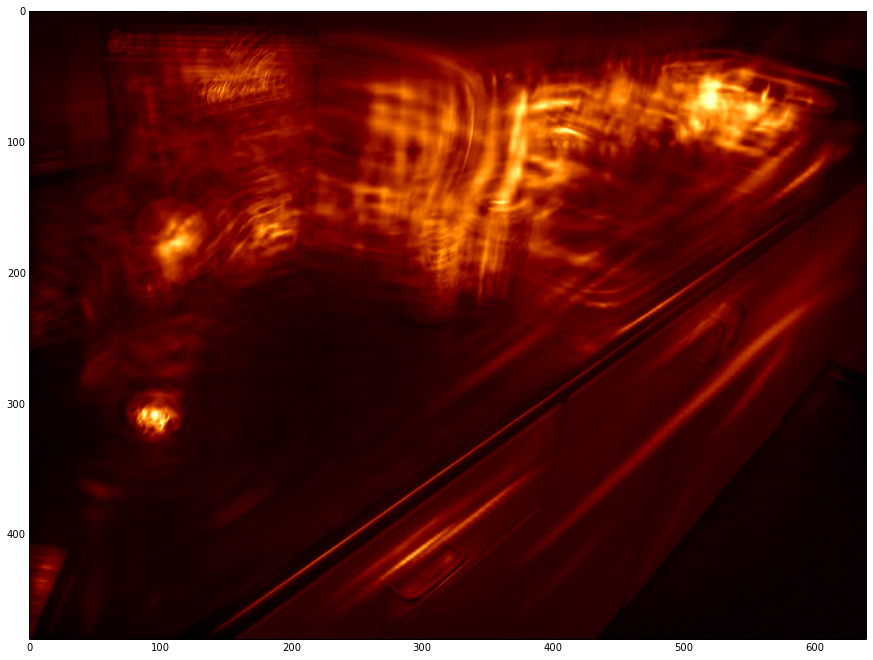

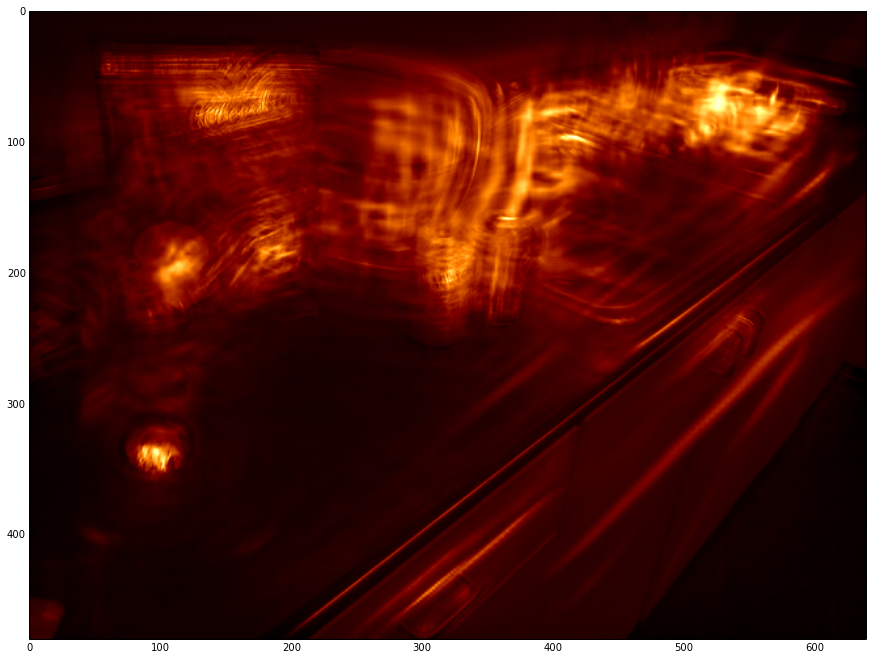

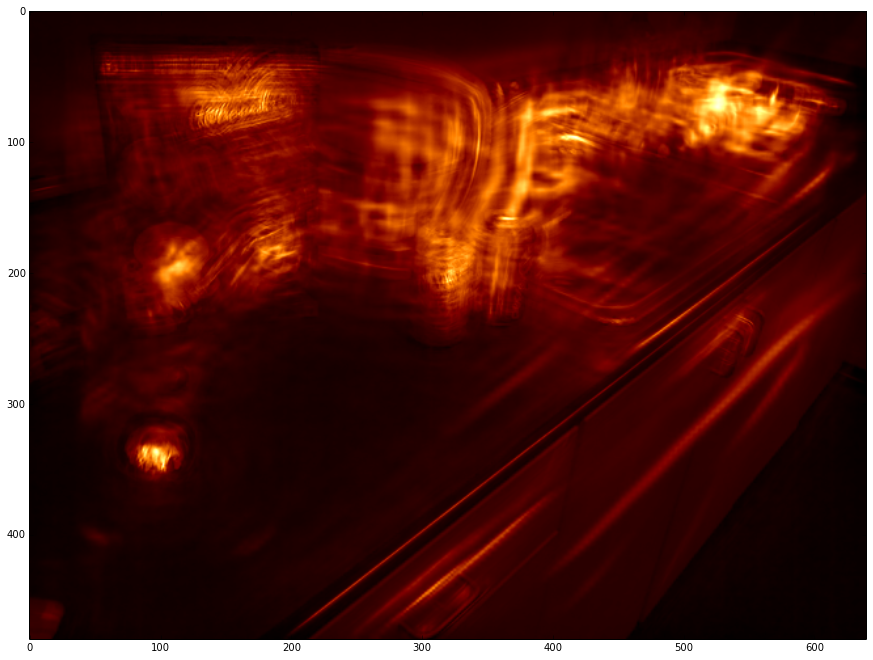

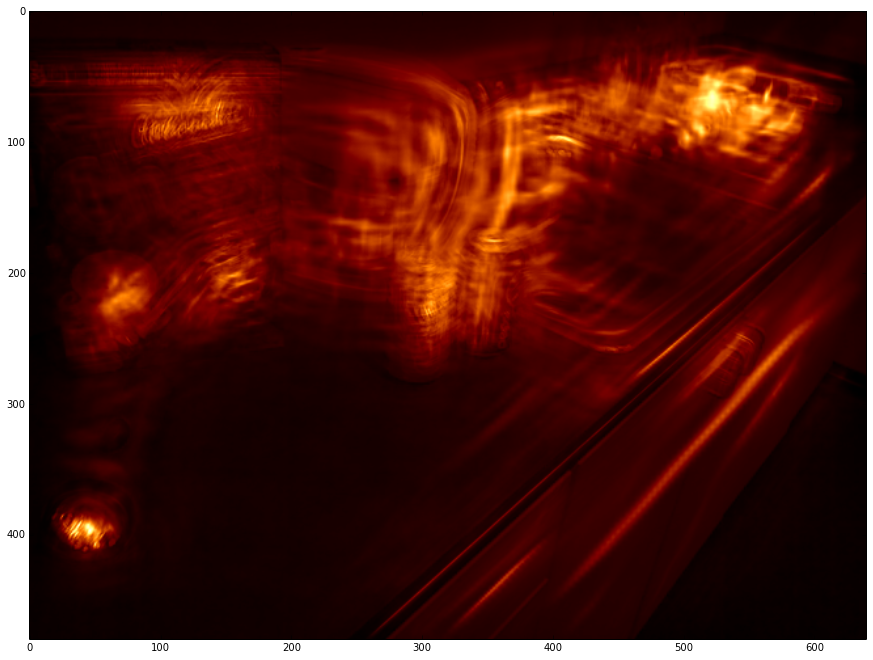

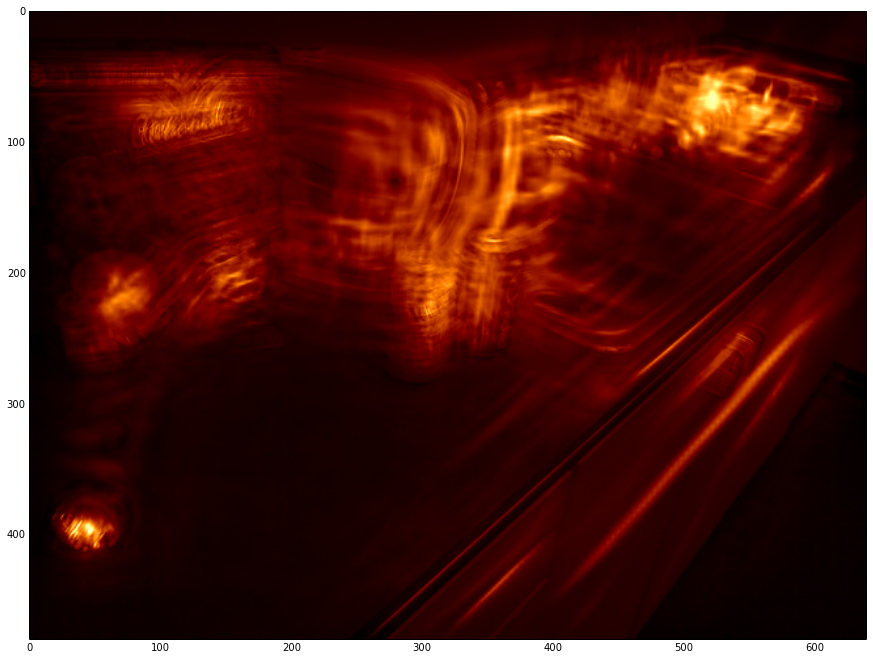

In [48]:
img0 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_100.png")
img1 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_70.png")
img2 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_102.png")
img3 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_103.png")
img4 = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_104.png")

imgs = [img0, img1, img2, img3, img4]

gast = pd.GASTDetector(levels=3, adjust_contrast=False)
gast.detect(img0, 15)

def plot_detections(img, sym):
    alpha = 0.2
    beta = 1.0-alpha
    gamma = 0.0
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, alpha, sym[1], beta, gamma)
    plt.figure(figsize=(15,15))
    plt.imshow(blend, cmap="afmhot")
    #plt.figure(figsize=(15,15))
    #plt.imshow(img)
    #plt.autoscale(False)
    #plt.plot(sym[0][:,1], sym[0][:,0], 'ro')

for im in imgs:
    csym = gast.cpu_detect(im, 15)
    sym = gast.detect(im, 15)
    plot_detections(im, sym)
    plot_detections(im, csym)


In [66]:
import pprint
pprint.pprint(dict(gast.stats.raw_metrics))

{'CPU': {'160x120': {7: [0.5654580593109131,
                         0.5692019462585449,
                         0.5591669082641602,
                         0.5631260871887207,
                         0.5586450099945068]},
         '320x240': {7: [2.6131138801574707,
                         2.6303718090057373,
                         2.6200170516967773,
                         2.6099140644073486,
                         2.6034011840820312]},
         '640x480': {7: [11.256648063659668,
                         11.316993951797485,
                         11.319818019866943,
                         11.249456882476807,
                         11.273842096328735]}},
 'GPU': {'160x120': {7: [0.005567073822021484,
                         0.005304098129272461,
                         0.0051839351654052734,
                         0.005219936370849609,
                         0.005240917205810547,
                         0.005268096923828125]},
         '320x240': {7: [0.018285

In [67]:
gast.stats.select_metric(['CPU', '320x240', 7])[2]

2.6153636

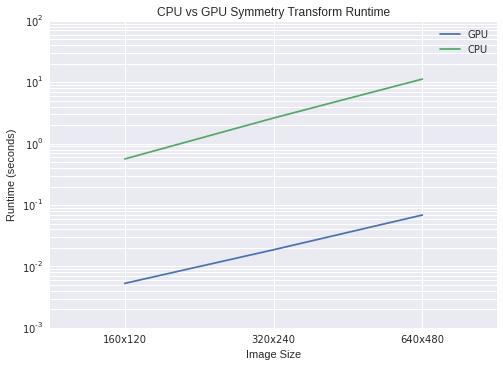

In [85]:
import seaborn as sns

res = list(reversed(['640x480', '320x240', '160x120']))
cpu_times = [gast.stats.select_metric(['CPU', r, 7])[2] for r in res]
gpu_times = [gast.stats.select_metric(['GPU', r, 7])[2] for r in res]

plt.figure()
ax = plt.axes()
ax.set_xmargin(0.05)
ax.set_yscale('log')
#ax.set_xticklabels(res)
plt.plot(gpu_times)
plt.plot(cpu_times)
plt.xlabel("Image Size")
plt.ylabel("Runtime (seconds)")
plt.xticks(range(0,len(res)), res)
plt.legend(["GPU","CPU"])
plt.title("CPU vs GPU Symmetry Transform Runtime")

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


255


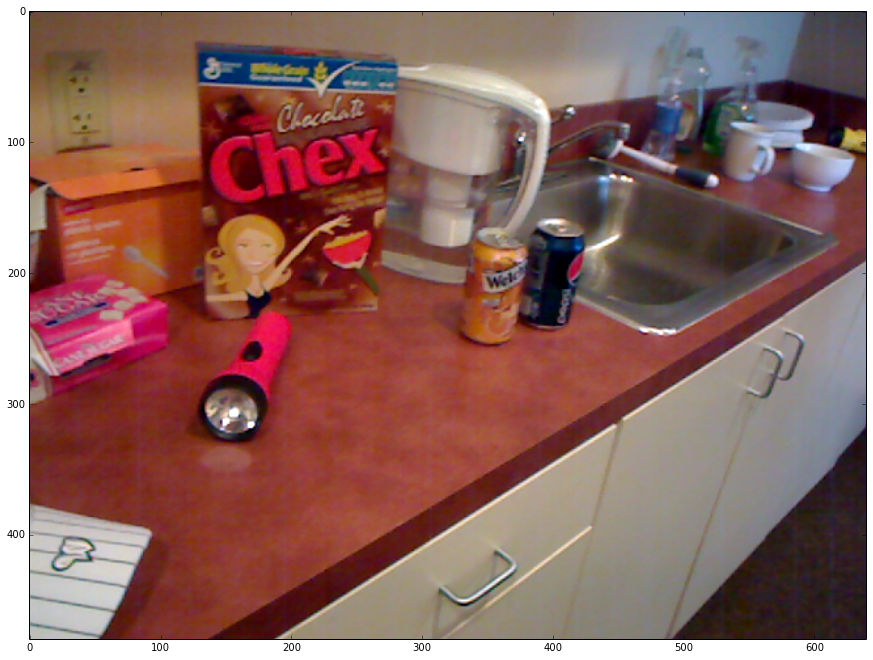

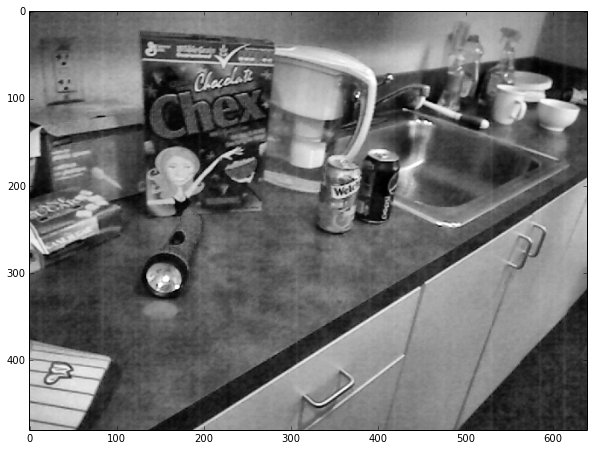

In [3]:
img = imread("/home/jlowens/Downloads/rgbd-scenes/kitchen_small/kitchen_small_1/kitchen_small_1_100.png")
segs = slic(img,n_segments=512,compactness=20.0)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = imread("/usr/local/src/datasets/kitti/sequences/06/image_0/000700.png")
#gimg = img
plt.figure(figsize=(15,15))
plt.imshow(img)

#plt.figure(figsize=(15,15))
#plt.imshow(mark_boundaries(img, segs))

clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
gimg = clahe.apply(gimg)
#gimg = cv2.bilateralFilter(gimg, 10, 10, 50)
#gimg = cv2.medianBlur(gimg, 5)
plt.figure(figsize=(10,10))
plt.imshow(gimg, cmap="gray")
print np.amax(gimg)

In [4]:
sym = pygast.Symmetry()

CPU times: user 2.21 ms, sys: 0 ns, total: 2.21 ms
Wall time: 2.09 ms
CPU times: user 95.5 ms, sys: 0 ns, total: 95.5 ms
Wall time: 95.6 ms
CPU times: user 6.67 ms, sys: 103 µs, total: 6.77 ms
Wall time: 6.81 ms
CPU times: user 527 ms, sys: 0 ns, total: 527 ms
Wall time: 527 ms
CPU times: user 3.55 ms, sys: 15.7 ms, total: 19.3 ms
Wall time: 19.4 ms
CPU times: user 2.48 s, sys: 38 µs, total: 2.48 s
Wall time: 2.48 s
CPU times: user 42.9 ms, sys: 27.9 ms, total: 70.8 ms
Wall time: 71.1 ms
CPU times: user 10.5 s, sys: 0 ns, total: 10.5 s
Wall time: 10.6 s
0.0257161
0.0428604
0.0425324
0.0464327


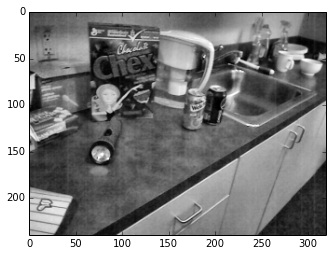

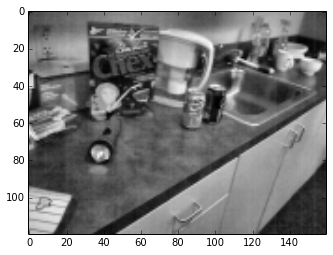

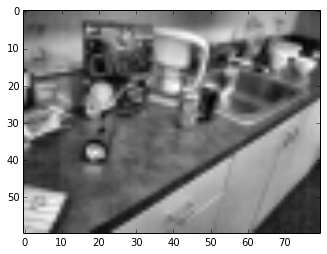

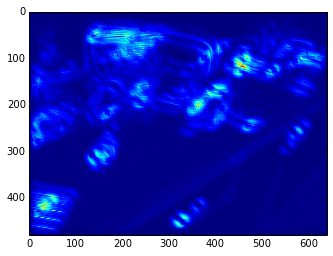

In [5]:
#gimg2 = cv2.resize(cv2.GaussianBlur(gimg), (320,240))
#gimg3 = cv2.resize(gimg, (160,120))
# gimg2 = cv2.pyrDown(gimg)#, (320,240))
# gimg3 = cv2.pyrDown(gimg2)#, (160,120))
# gimg4 = cv2.pyrDown(gimg3)#, (80,60))
gimg2 = cv2.resize(gimg, (gimg.shape[1]/2, gimg.shape[0]/2))
gimg3 = cv2.resize(gimg2, (gimg2.shape[1]/2, gimg2.shape[0]/2))
gimg4 = cv2.resize(gimg3, (gimg3.shape[1]/2, gimg3.shape[0]/2))


plt.figure()
plt.imshow(gimg2, cmap="gray")
plt.figure()
plt.imshow(gimg3, cmap="gray")
plt.figure()
plt.imshow(gimg4, cmap="gray")

smag = np.zeros(gimg.shape, dtype=np.float32)
sdir = np.zeros(gimg.shape, dtype=np.float32)
smag2 = np.zeros(gimg2.shape, dtype=np.float32)
sdir2 = np.zeros(gimg2.shape, dtype=np.float32)
smag3 = np.zeros(gimg3.shape, dtype=np.float32)
sdir3 = np.zeros(gimg3.shape, dtype=np.float32)
smag4 = np.zeros(gimg4.shape, dtype=np.float32)
sdir4 = np.zeros(gimg4.shape, dtype=np.float32)

%time sym.transform(gimg4, smag4, sdir4, 7)
%time sym.cpu_transform(gimg4, smag4, sdir4, 7)
%time sym.transform(gimg3, smag3, sdir3, 7)
%time sym.cpu_transform(gimg3, smag3, sdir3, 7)
%time sym.transform(gimg2, smag2, sdir2, 7)
%time sym.cpu_transform(gimg2, smag2, sdir2, 7)
%time sym.transform(gimg, smag, sdir, 7)
%time sym.cpu_transform(gimg, smag, sdir, 7)

plt.figure()
plt.imshow(smag)

print np.amax(smag4)
print np.amax(smag3)
print np.amax(smag2)
print np.amax(smag)


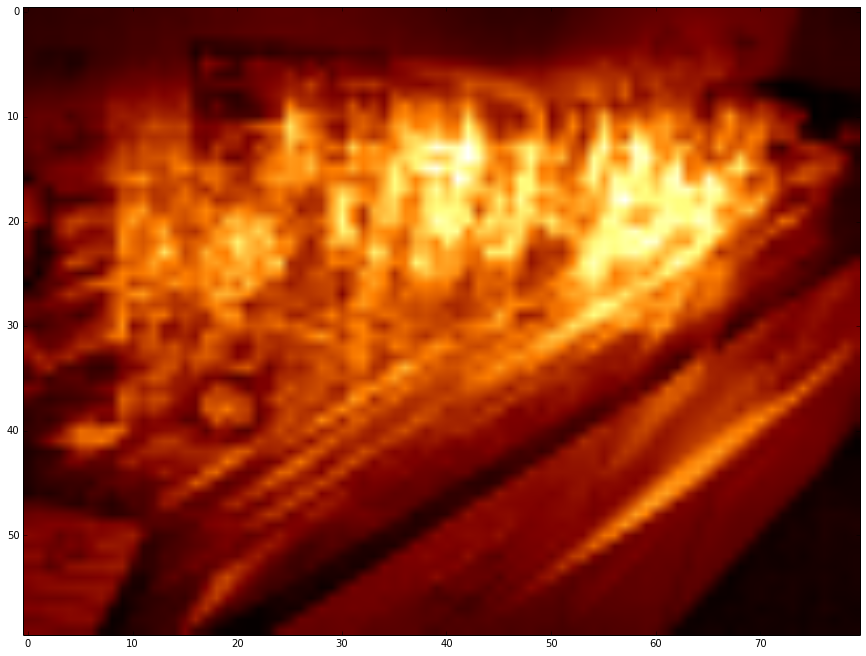

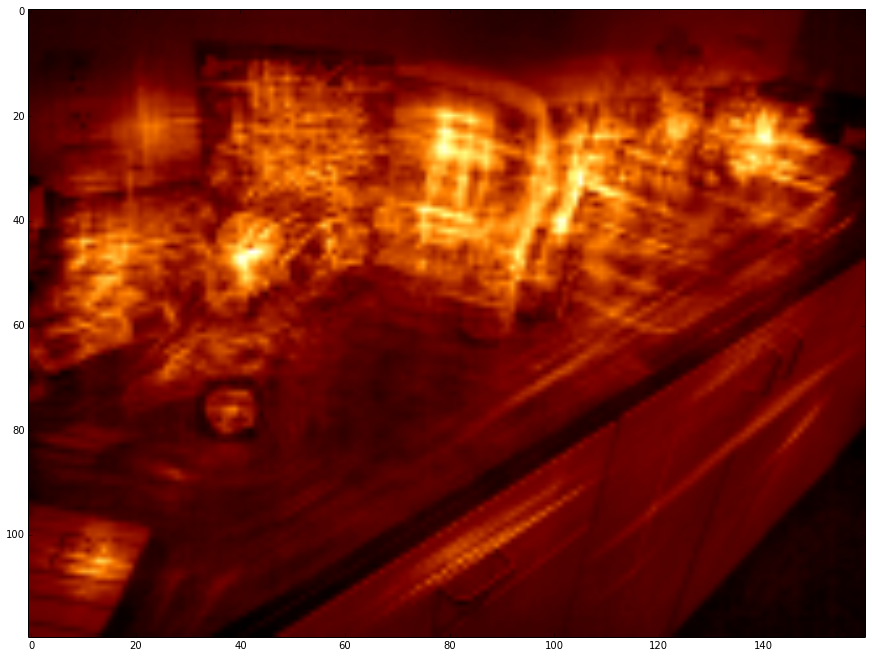

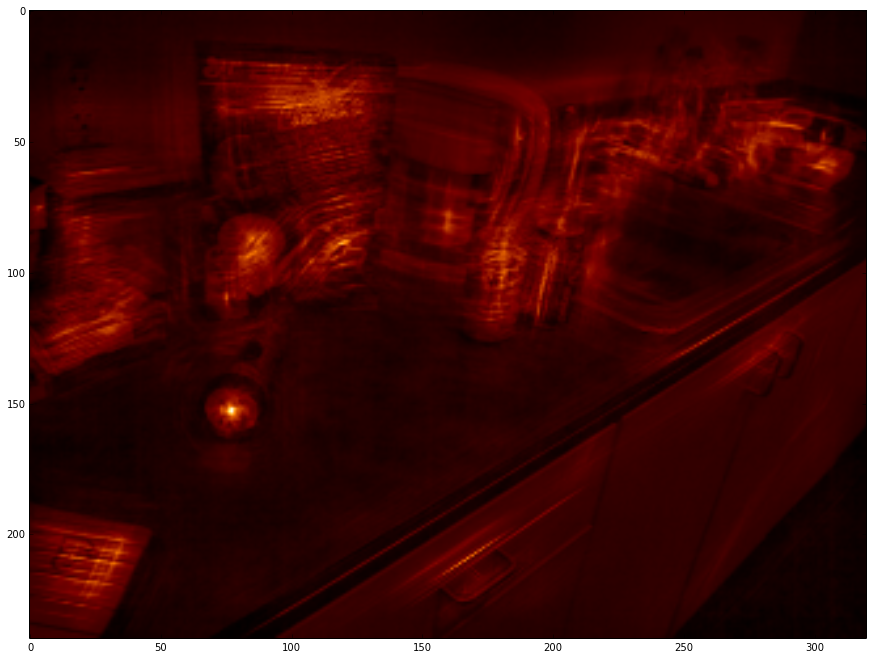

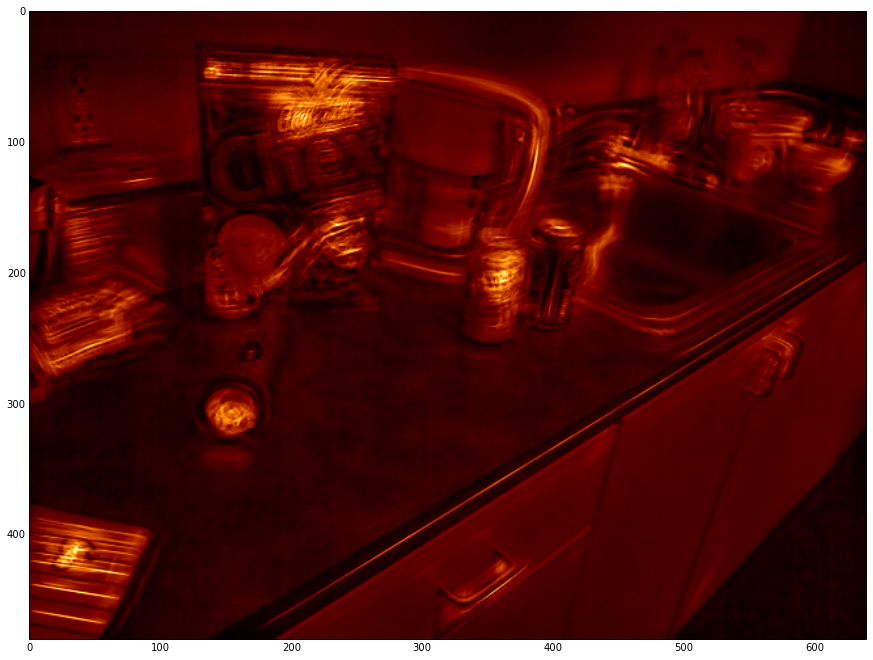

In [7]:
alpha = 0.1
beta = 1.0-alpha
gamma = 0.0
blend4 = cv2.addWeighted(gimg4.astype(np.float32)/255.0, alpha, smag4, beta, gamma)
blend3 = cv2.addWeighted(gimg3.astype(np.float32)/255.0, alpha, smag3, beta, gamma)
blend2 = cv2.addWeighted(gimg2.astype(np.float32)/255.0, alpha, smag2, beta, gamma)
blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, alpha, smag, beta, gamma)


plt.figure(figsize=(15,15))
plt.imshow(blend4, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend3, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend2, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend, cmap="afmhot")

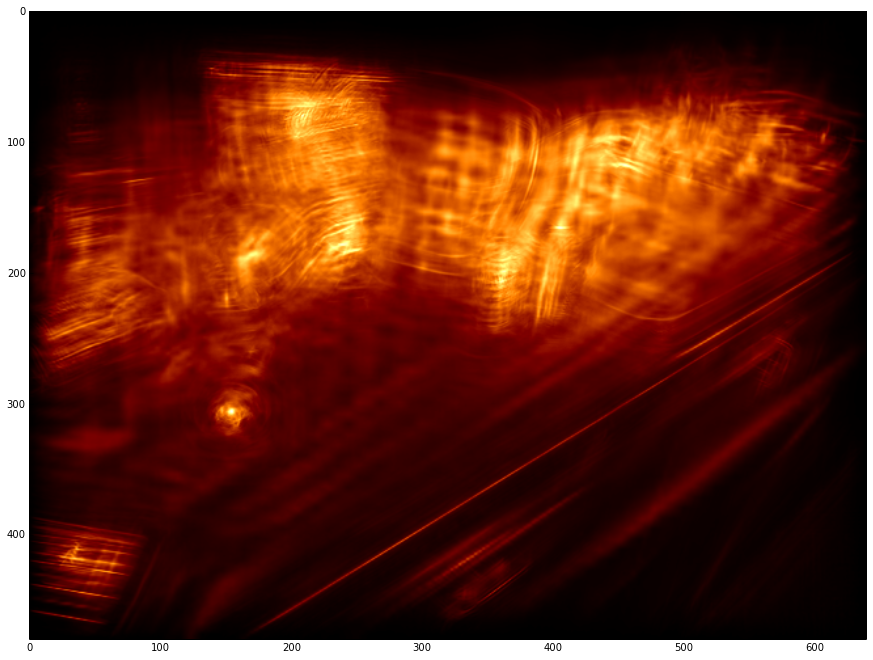

In [8]:
#out4 = np.zeros_like(smag)
#out3 = np.zeros_like(smag)
#out2 = np.zeros_like(smag)
maxes = np.array([np.amax(smag), np.amax(smag2), np.amax(smag3), np.amax(smag4)])
scale = np.amax(maxes)

full_shape = gimg.shape[::-1]
out4 = cv2.resize(smag4,full_shape)
out4 = out4 / scale
out3 = cv2.resize(smag3,full_shape)
out3 = out3 / scale
out2 = cv2.resize(smag2,full_shape)
out2 = out2 / scale
out = smag / scale

collected = out4 + out3 + out2 + out
#collected = collected * .25
plt.figure(figsize=(15,15))
plt.imshow(collected, cmap="afmhot")

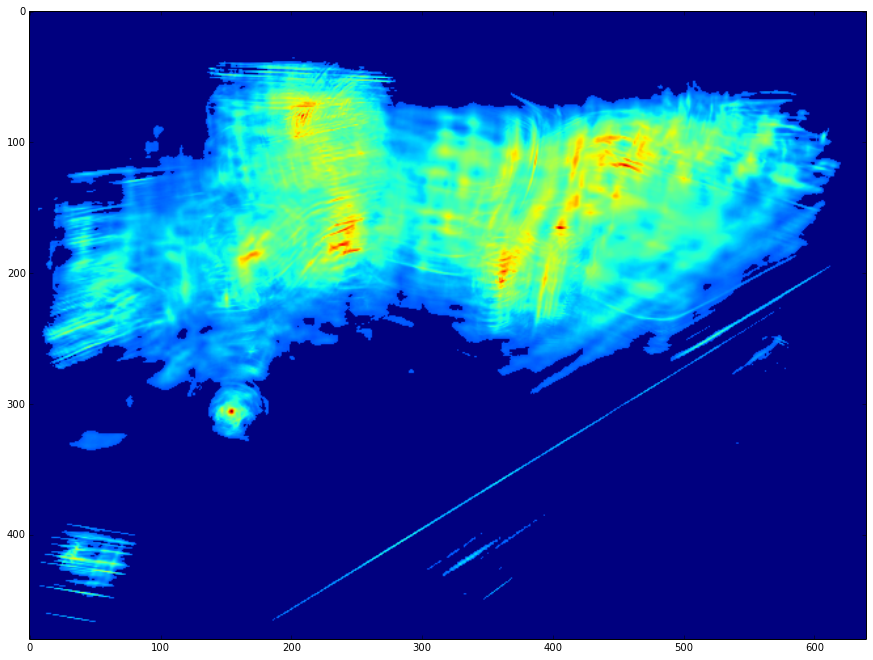

In [9]:
ret, tsym = cv2.threshold(collected, 0.3, 0.0, cv2.THRESH_TOZERO)
plt.figure(figsize=(15,15))
plt.imshow(tsym)

(89, 2)


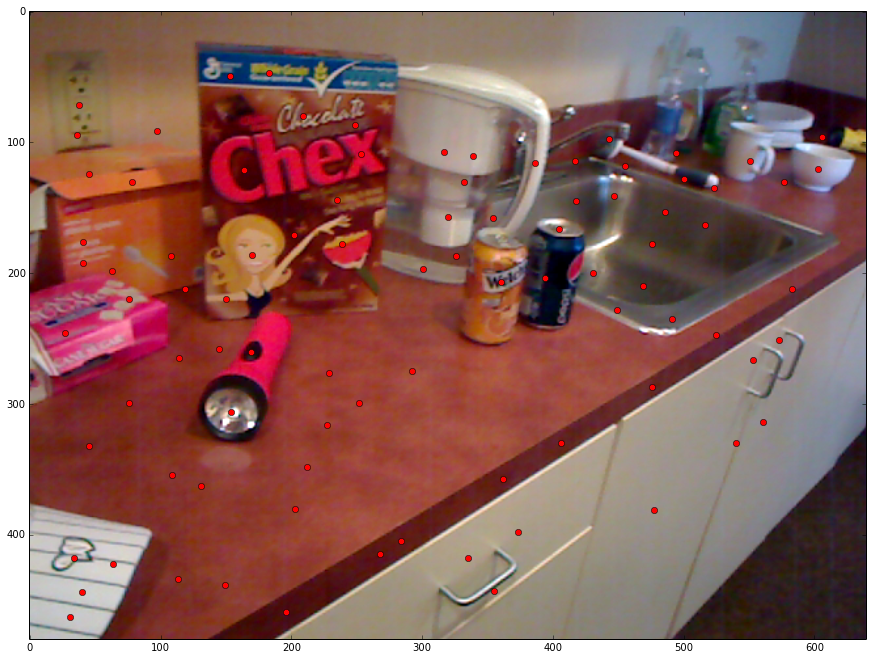

In [12]:
from skimage.feature import peak_local_max

max_coords = peak_local_max(collected, min_distance=15)
print max_coords.shape
plt.figure(figsize=(15,15))
#plt.imshow(mark_boundaries(img, segs),cmap="gray")
plt.imshow(img, cmap="gray")
plt.autoscale(False)
plt.plot(max_coords[:,1], max_coords[:,0], 'ro')